# Correlations

FILES

https://raw.githubusercontent.com/ScryptIQ-ai/lesson-data/refs/heads/main/dh/everleys_data.csv
https://raw.githubusercontent.com/ScryptIQ-ai/lesson-data/refs/heads/main/dh/patients.csv

PACKAGES

pandas
matplotlib

## Introduction

**Learning Objectives**
- Understand an implement calculation of the correlation coefficient
- Create heatmaps of the correlation matrix
- How to analyse correlation coefficients

Bivariate measures are quantities that are calculated from two variables of data. Bivariate features are the most widely used subset of multivariate features - all of which require more than one variable in order to be calculated.

The concept behind many bivariate measures is to quantify "similarity" between two datasets. If any similarity is observed, it is assumed that there is a connection or relationship in the data. For variables exhibiting similarity, knowledge of one understandably leads to an expectation surrounding the other.

## The Correlation Coefficient

Here we are going to look at a specific bivariate quantity: the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) *PCC*.

The formula for the *PCC* is set up such that two identical datasets yield a *PCC* of 1. Technically, this is achieved by normalising all variances to be equal to 1. This also implies that all data points in a scatter plot of one variable plotted against itself are aligned along the main diagonal (with a positive slope).

In two perfectly antisymmetrical datasets, where one variable can be obtained by multiplying the other by -1, a value of -1 is obtained. This implies that all data points in a scatter plot are aligned along the negative, or anti diagonal, (with a negative slope). All other possibilities lie in between. A value of 0 refers to precisely balanced positive and negative contributions to the measure. However - strictly speaking - the latter does not necessarily indicate that there is no relationship between the variables.

The PCC is an **undirected** measure. This means that its value for the comparison between dataset 1 and dataset 2 is exactly the same as the *PCC* between dataset 2 and dataset 1.

In [2]:
# First, lets load in the functions for this section

from pandas import read_csv
from matplotlib.pyplot import subplots, show

# Specific numpy functions, description in the main body
from numpy import arange, isnan

A method to directly calculate the *PCC* of your data, is to use the method `.corr()` with your DataFrame. For instance, we can apply it to the Everleys dataset:

In [3]:
# Load in our dataset
df_everley = read_csv('./data/everleys_data.csv')
# Use the method .corr()
df_everley.corr()

calcium    sodium
calcium  1.000000 -0.258001
sodium  -0.258001  1.000000

The result as a matrix of two-by-two numbers. Along the diagonal (top left and bottom right) are the values for the comparison of a column to itself. As any dataset is identical with itself, the values are one by definition.

The non-diagonal elements indicate that **CC is approx. -0.26** for the two datasets. Both **CC(calcium-sodium)** and **CC(sodium-calcium)** are given in the matrix, however because of the symmetry, we would only need to report one out of the two.

NOTE BOX

In this lesson we introduce how to calculate the *PCC* but do not discuss its significance. For example, interpreting the value above requires consideration of the fact that we only have only 18 data points. Specifically, we refrain from concluding that because the $PCC$ is negative, a high value for the calcium concentration is associated with a small value for sodium concentration (relative to their respective means).

One quantitative way to assess whether or not a given value of the $PCC$ is meaningful or not, is to use surrogate data. In our example, we could create random numbers in an array with shape (18, 2), for instance - such that the two means and standard deviations are the same as in the Everley dataset, but the two columns are independent of each other. Creating many realisations, we can check what distribution of $PCC$ values is expected from the randomly generated data, and compare this against the values obtained from the Everleys dataset.

Much of what we will cover in the Machine Learning component of L2D will involve NumPy arrays. Let us, therefore, convert the Everleys dataset from a Pandas DataFrame into a NumPy array.

A [NumPy array](https://numpy.org/doc/2.2/user/whatisnumpy.html) is a data structure much like a list, however it is built for mathematical operations. Typical analytical tasks such as sorting, selecting, linear algebra, statistics, ect. are all much quicker than using a list. Additionally, these operations can be applied easily to the whole structure or **array** without having to loop over every **item** in term.

In [4]:
# Pandas Dataframes can be easily converted to numpy arrays
everley_numpy = df_everley.to_numpy()

everley_numpy

array([[  3.4555817 , 112.69098   ],
       [  3.6690263 , 125.66333   ],
       [  2.7899104 , 105.82181   ],
       [  2.9399    ,  98.172772  ],
       [  5.42606   ,  97.931489  ],
       [  0.71581063, 120.85833   ],
       [  5.6523902 , 112.8715    ],
       [  2.7899104 ,          nan],
       [  3.5713201 , 112.64736   ],
       [  4.3000669 , 132.03172   ],
       [  1.3694191 , 118.49901   ],
       [  2.550962  , 117.37373   ],
       [  2.8941294 , 134.05239   ],
       [  3.6649873 , 105.34641   ],
       [  1.3627792 , 123.35949   ],
       [         nan, 118.49901   ],
       [  3.7187978 , 125.02106   ],
       [  1.8658681 , 112.07542   ],
       [  3.2728091 , 117.58804   ],
       [  3.9175915 , 101.00987   ]])

We can see that the numbers remain the same, but the format has changed; we have lost the names of the columns. Similar to a Pandas DataFrame, we can also make use of the `shape` function to see the dimensions of the data array.

In [5]:
everley_numpy.shape

(20, 2)

We can now use the NumPy function `corrcoef` to calculate the Pearson correlation.

The function `corrcoef` takes a two-dimensional array as its input. The keyword argument `rowvar` is True by default, which means that the correlation will be calculated along the rows of the dataset. As we have the data features contained in the columns, the value of `rowvar` needs to be set to False. (You can check what happens if you set it to 'True'. Instead of a 2x2 matrix for two columns you will get a 18x18 matrix for eighteen pair comparisons.)

We mentioned that the values of the $PCC$ are calculated such that they must lie between -1 and 1. This is achieved by normalisation with the variance. If, for any reason, we don't want the similarity calculated using this normalisation, what results is the so-called **covariance**. In contrast to the $PCC$, its values will depend on the absolute size of the numbers in the data array. From the NumPy library, we can use the function `cov` in order to calculate the covariance:

In [6]:
from numpy import corrcoef

In [7]:
corr_matrix = corrcoef(everley_numpy, rowvar=False)

corr_matrix

array([[nan, nan],
       [nan, nan]])

However, the NumPy version of corrcoef doesn't like `NaN` values on the array. We therefore need to remove them first, repeating what we learned in [**PF1**](../PF1/data-features.html).

In [8]:
replacement_values = {"calcium" : 0, "sodium" : 0}
df_everley = df_everley.fillna(value = replacement_values)
everley_numpy = df_everley.to_numpy()

In [9]:
corr_matrix = corrcoef(everley_numpy, rowvar=False)

corr_matrix

array([[ 1.        , -0.06369536],
       [-0.06369536,  1.        ]])

The function `corrcoef` takes a two-dimensional array as its input. The keyword argument `rowvar` is True by default, which means that the correlation will be calculated along the rows of the dataset. As we have the data features contained in the columns, the value of `rowvar` needs to be set to False.

We mentioned that the values of the **PCC** are calculated such that they must lie between -1 and 1. This is achieved by normalisation with the variance. If, for any reason, we don't want the similarity calculated using this normalisation, what results is the so-called **covariance**. In contrast to the **PCC**, its values will depend on the absolute size of the numbers in the data array. From the NumPy library, we can use the function `cov` in order to calculate the covariance:

In [10]:
from numpy import cov

In [11]:
cov_matrix = cov(everley_numpy, rowvar=False)

cov_matrix

array([[  2.03239362,  -2.51857237],
       [ -2.51857237, 769.28168435]])

The result shows how covariance is strongly dependent on the actual numerical values in a data column. The two values along the diagonal are identical with the variances obtained by squaring the standard deviation (calculated, for example, using the `describe` function).

PRACTICE EXERCISE

Calculate the Pearson **PCC** between the systolic and the diastolic blood pressure from the patients data using:

- The Pandas DataFrame
- The data as a NumPy array.

It is worth noting that it is equally possible to calculate the correlation between rows of a two-dimension array (i.e. `rowvar=True`) but the interpretation will differ. Imagine a dataset where for two subjects a large number, call it $N$, of metabolites were determined quantitatively (a Metabolomics dataset).  If that dataset is of shape (2, N) then one can calculate the correlation between the two rows. This would be done to determine the correlation of the metabolite profiles between the two subjects.

## The Correlation Matrix

VIDEO

https://www.youtube.com/watch?v=Z8eX4ncHjyQ

If we have more than two columns of data, we can obtain a Pearson correlation coefficient for each pair. In general, for N columns, we get $N^2$ pairwise values. We will omit the correlations of each column relative to itself, of which there are $N$, which means we are left with **N x (N-1)** pairs. Since each value appears twice, due to the symmetry of the calculation, we can ignore half of them, leaving us with **N x (N-1) / 2** coefficients for **N** columns.

Here is an example using the 'patients' data:

In [13]:
df = read_csv('./data/patients.csv')

# As there is string data (Gender) we must set it to numeric only
df.corr(numeric_only=True)

Age    Height    Weight  Systolic  Diastolic    Smoker
Age        1.000000  0.116002  0.091356  0.134127   0.080597  0.060220
Height     0.116002  1.000000  0.695970  0.214076   0.156819  0.199114
Weight     0.091356  0.695970  1.000000  0.155788   0.222687  0.215586
Systolic   0.134127  0.214076  0.155788  1.000000   0.511843  0.706323
Diastolic  0.080597  0.156819  0.222687  0.511843   1.000000  0.723365
Smoker     0.060220  0.199114  0.215586  0.706323   0.723365  1.000000

If we do the calculation with the Pandas DataFrame we get the coefficients for the six columns, as we're dropping "Gender" through `numeric_only`. Note that the values that involves the 'Smoker' column are meaningless, since they represent a True/False-like binary.

Let us now convert the DataFrame into a NumPy array, and check its shape:

In [14]:
patients_numpy = df.to_numpy()
patients_numpy.shape

(100, 7)

Next, we can try to calculate the correlation matrix for the first five columns (dropping smoker) of this data array. If we do this directly to the array, we get an AttributeError: 'float' object has no attribute 'shape'.

This is amended by converting the array to a floating point prior to using the `corrcoef` function. For this, we can convert the data type using the method `astype(float)`:

In [15]:
cols = 5

# Select all rows and the first 5 column (excluding Smoker)
patients_numpy_float = patients_numpy[:, :cols].astype(float)

patients_corr = corrcoef(patients_numpy_float, rowvar=False)

patients_corr

array([[1.        , 0.11600246, 0.09135615, 0.13412699, 0.08059714],
       [0.11600246, 1.        , 0.6959697 , 0.21407555, 0.15681869],
       [0.09135615, 0.6959697 , 1.        , 0.15578811, 0.22268743],
       [0.13412699, 0.21407555, 0.15578811, 1.        , 0.51184337],
       [0.08059714, 0.15681869, 0.22268743, 0.51184337, 1.        ]])

The result is called the **correlation matrix**. It contains all the bivariate comparisons possible for the five chosen columns.

In the calculation above, we used the $PCC$ in order to calculate the matrix. In general, any bivariate measure can be used to obtain a matrix of the same shape.

## Heatmaps

To get an illustration of the correlation pattern in a dataset, we can plot the correlation matrix as a heatmap.

Below are three lines of code, that make use of functionality within `Matplotlib`, to plot a heatmap of the correlation matrix from the 'patients' dataset. We make use of the function `imshow`:

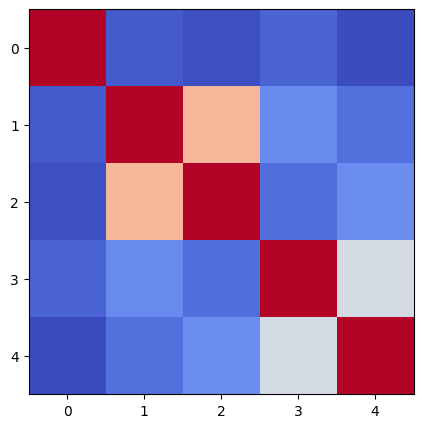

In [16]:
fig, ax = subplots(figsize=(5,5))

im = ax.imshow(patients_corr, cmap='coolwarm');

show()

NOTE BOX

We have specified the colour map `coolwarm`, using the keyword argument `cmap`. For a list of `Matplotlib` colour maps, please refer to the [gallery in the documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.htmll). The names to use in the code are on the left hand side of the colour bar.

Let us add two more features to improve this figure.

Firstly, in order to highlight true correlations stand out (rather than the trivial self-correlations along the diagonal, which are always equal to 1) we can deliberately set the diagonal as being equal to 0. To achieve this, we use the NumPy function `fill_diagonal`.

Secondly, the `imshow` function, by default, will scale the colours to the minimum and maximum values present in the array. As such, we do not know what red or blue means. To see the colour bar, it can be added to the figure environment 'fig' using `colorbar`.

In [17]:
from numpy import fill_diagonal

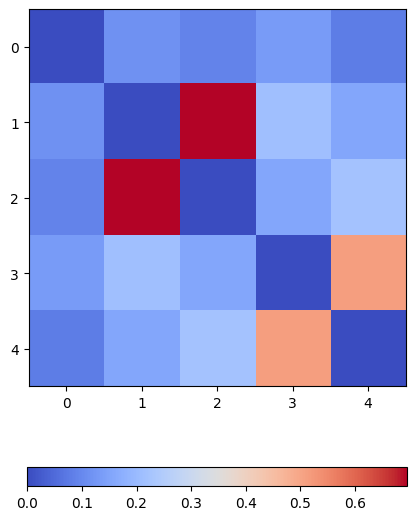

In [18]:
fill_diagonal(patients_corr, 0)

fig, ax = subplots(figsize=(7,7))

im = ax.imshow(patients_corr, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.7);

show()

The result is that the correlation between columns 'Height' and 'Weight' is the strongest, and presumably higher than would be expected if these two measures were independent. We can confirm this by plotting a scatter plot for these two columns, and refer to the scatter plot for columns 2 (Height) and 5 (Diastolic blood pressure):

PRACTICE EXERCISE

Calculate and plot the correlation matrix of the first five columns, as above, based on the [Spearman rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). This is based on the ranking of values instead of their numerical values as for the Pearson coefficient. Spearman therefore tests for monotonic relationships, whereas Pearson tests for linear relationships.

To import the function in question:

```
from scipy.stats import spearmanr
```

You can then apply it:

```
data_spearman_corr = spearmanr(data).correlation
```

## Analysis of the Correlation matrix

To analyse the correlations in a dataset, we are only interested in the **N x (N-1)/2** unduplicated correlation coefficients. Here is a way to extract them and assign them to a variable.

Firstly, we must import the function `triu_indices`. It provides the indices of a matrix with specified size. The required size is obtained from our correlation matrix, using `len`. It is identical to the number of columns for which we calculated the $CCs$.

We also need to specify that we do not want the diagonal to be included. For this, there is an offset parameter 'k', which collects the indices excluding the diagonal, provided it is set to 1. (To include the indices of the diagonal, it would have to be set to 0).

In [20]:
# FIXED WITH NO OUTPUT

from numpy import triu_indices

In [21]:
# Get the number of rows of the correlation matrix
no_cols = len(patients_corr)

# Get the indices of the 10 correlation coefficients for 5 data columns
corr_coeff_indices = triu_indices(no_cols, k=1)

# Get the 10 correlation coefficients
corr_coeffs = patients_corr[corr_coeff_indices]

print(corr_coeffs)

[0.11600246 0.09135615 0.13412699 0.08059714 0.6959697  0.21407555
 0.15681869 0.15578811 0.22268743 0.51184337]


Now we plot these correlation coefficients as a bar chart to see them one next to each other.

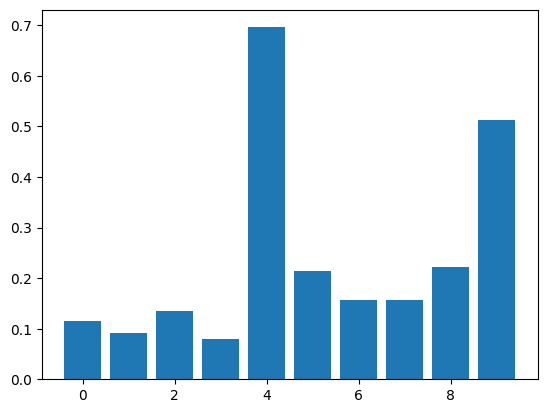

In [22]:
fig, ax = subplots()

bins = arange(len(corr_coeffs))

ax.bar(bins, corr_coeffs)

show()

If there are a large number of coefficients, we can also display their histogram or boxplot as summary statistics.

### The Average Correlation per Column

On a higher level, we can calculate the overall, or average correlation per data column. This can be achieved by averaging over either the rows or the columns of the correlation matrix. Because our similarity measure is undirected, both ways of summing yield the same result.

However, we need to consider whether the value is positive or negative. Correlation coefficients can be either positive or negative. As such, adding for instance +1 and -1 would yield an average of 0, even though both indicate perfect correlation and anti-correlation, respectively. This can be addressed by using the absolute value `abs`, and ignoring the sign.

In order to average, we can use the NumPy function: `mean`. This function defaults to averaging over all values of the matrix. In order to obtain the five values by averaging over the columns, we specify the 'axis' keyword argument must be specified as 0.

In [23]:
from numpy import abs, mean

[0.08441655 0.23657328 0.23316028 0.20316681 0.19438933]


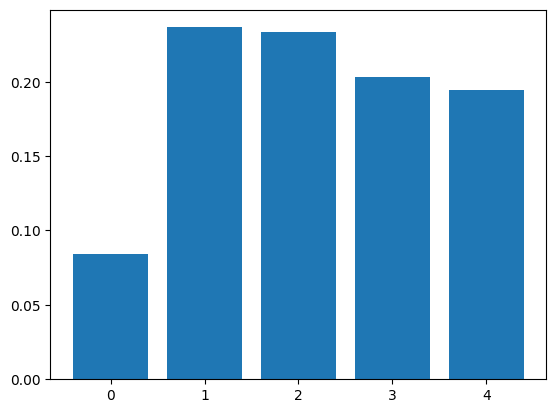

In [ ]:
# Absolute values of correlation matrix
corr_matrix_abs = abs(patients_corr)

# Average of the correlation strengths
corr_column_average = mean(corr_matrix_abs, axis=0)

fig, ax = subplots()

bins = arange(corr_column_average.shape[0])

ax.bar(bins, corr_column_average );

show()

In [ ]:
print(f"Means per column: {corr_column_average}")

[0.08441655 0.23657328 0.23316028 0.20316681 0.19438933]


### The Average Dataset Correlation

The sum over rows or columns has given us a reduced set of values to look at. We can now take the final step and average over all correlation coefficients. This will yield the average correlation of the dataset. It condenses the full bivariate analysis into a single number, and can be a starting point when comparing different datasets of the same type, for example.

In [25]:
# Average of the correlation strengths
corr_matrix_average = mean(corr_matrix_abs)

print('Average correlation strength: ', round(corr_matrix_average, 3))

Average correlation strength:  0.19


## Summary

Analysis of the correlation between features is an important beginning step in machine learning. The tools we have learned here can be used to reduce the feature space for subsequent learning or help us narrow down on a key feature early on, skipping machine learning entirely.